# Converter : Symbolic Music representations


In [1]:
from midiConverter import Converter
from Visualizer import Visualizer
from MidiLikeSeq import MidiLikeSeq
from NoteTupleSeq import NoteTupleSeq
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import pretty_midi as pm
from note_seq.protobuf import music_pb2
import note_seq
import glob

/home/erik/.local/lib/python3.8/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/home/erik/.local/lib/python3.8/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
def convert_midi2hz(pitch):
    return np.power(2, pitch/12)*440

## Midi to Midi-Like
Midi file used: 

In [3]:
midi_file = "arpege.mid" #"monophonic-and-pauses.mid"
path = "midi-files-test/"
path_save = "generated-midi-files/"

In [4]:
c = Converter()
midi_like_seq = c.midi2midi_like(path + midi_file)
midi_like_seq.show()

seq = c.midi_like2seq(midi_like_seq)
note_seq.sequence_proto_to_midi_file(seq,path_save + midi_file[:-4]+ "_midi_like.mid")

#saving : 
midi_like_seq.save("midi-like.txt")


SET_VELOCITY<50.0>
NOTE_ON<62>
TIME_SHIFT<125.0>
NOTE_OFF<62.0>
NOTE_ON<62>
TIME_SHIFT<125.0>
NOTE_OFF<62.0>
NOTE_ON<74>
TIME_SHIFT<125.0>
NOTE_OFF<74.0>
TIME_SHIFT<125.0>
NOTE_ON<69>
TIME_SHIFT<125.0>
NOTE_OFF<69.0>
TIME_SHIFT<250.0>
NOTE_ON<68>
TIME_SHIFT<125.0>
NOTE_OFF<68.0>
TIME_SHIFT<125.0>
NOTE_ON<67>
TIME_SHIFT<125.0>
NOTE_OFF<67.0>
TIME_SHIFT<125.0>
NOTE_ON<65>
TIME_SHIFT<125.0>
NOTE_OFF<65.0>
TIME_SHIFT<125.0>
NOTE_ON<62>
TIME_SHIFT<125.0>
NOTE_OFF<62.0>
NOTE_ON<65>
TIME_SHIFT<125.0>
NOTE_OFF<65.0>
NOTE_ON<67>
TIME_SHIFT<125.0>
NOTE_OFF<67.0>
NOTE_ON<60>
TIME_SHIFT<125.0>
NOTE_OFF<60.0>
NOTE_ON<60>
TIME_SHIFT<125.0>
NOTE_OFF<60.0>
NOTE_ON<74>
TIME_SHIFT<125.0>
NOTE_OFF<74.0>
TIME_SHIFT<125.0>
NOTE_ON<69>
TIME_SHIFT<125.0>
NOTE_OFF<69.0>
TIME_SHIFT<250.0>
NOTE_ON<68>
TIME_SHIFT<125.0>
NOTE_OFF<68.0>
TIME_SHIFT<125.0>
NOTE_ON<67>
TIME_SHIFT<125.0>
NOTE_OFF<67.0>
TIME_SHIFT<125.0>
NOTE_ON<65>
TIME_SHIFT<125.0>
NOTE_OFF<65.0>
TIME_SHIFT<125.0>
NOTE_ON<62>
TIME_SHIFT<125.0>
NOTE_O

Number of instruments :  1


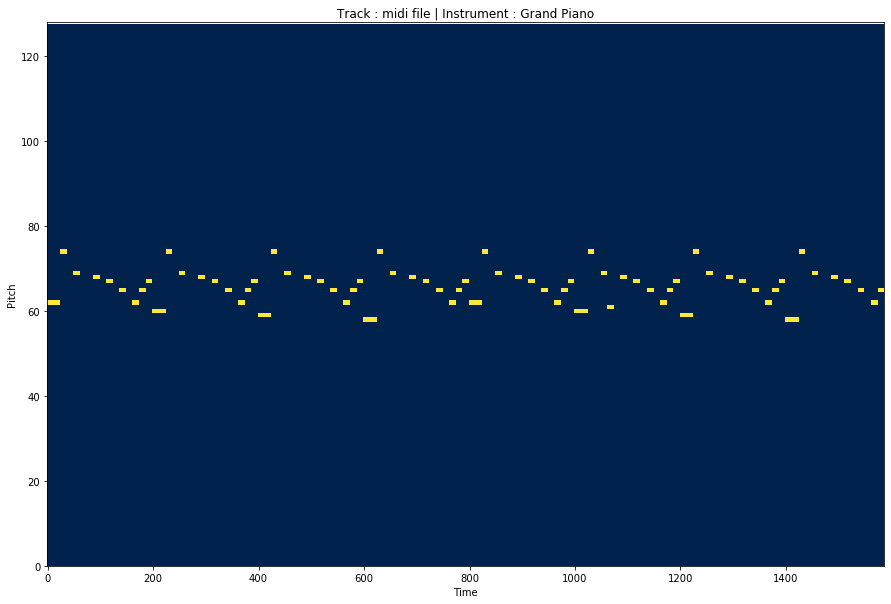

In [5]:
midi_data = pm.PrettyMIDI(path + midi_file)
v1 = Visualizer(midi_data)
v1.show_midi_notes(DEBUG = True)

Number of instruments :  1


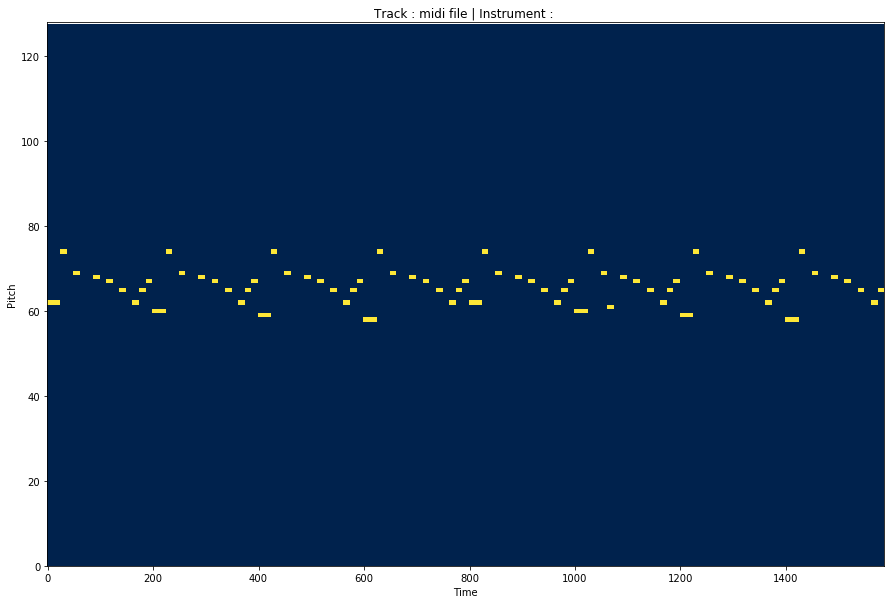

In [6]:

midi_data = pm.PrettyMIDI(path_save + midi_file[:-4]+"_midi_like.mid")
v2 = Visualizer(midi_data)

v2.show_midi_notes(DEBUG = True)


### Comparison between original and reconstruct : 

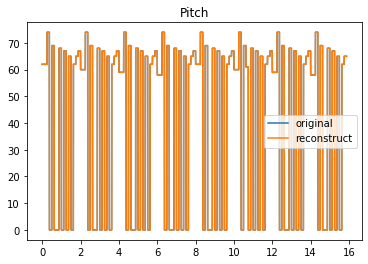

In [7]:
import matplotlib.pyplot as plt

t1, p1, l1 = v1.get_f0_loudness_time()
t2, p2, l2 = v2.get_f0_loudness_time()

plt.plot(t1, p1, label = "original")
plt.plot(t2, p2, label = "reconstruct")
plt.title("Pitch")
plt.legend()
plt.show()

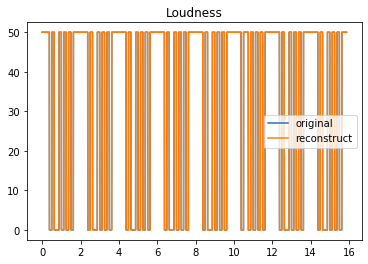

In [8]:
plt.plot(t1, l1, label = "original")
plt.plot(t2, l2, label = "reconstruct")
plt.title("Loudness")
plt.legend()
plt.show()

## Midi to Note tuple :


Converting midi to note tuple : 

In [9]:
c = Converter()

note_tuple_seq = c.midi2note_tuple(path + midi_file)
note_tuple_seq.save("note-tuples.txt")
note_tuple_seq


(0,0,62,50,0,12)
(0,12,62,50,0,12)
(0,12,74,50,0,12)
(0,25,69,50,0,12)
(0,37,68,50,0,12)
(0,25,67,50,0,12)
(0,25,65,50,0,12)
(0,25,62,50,0,12)
(0,12,65,50,0,12)
(0,12,67,50,0,12)
(0,12,60,50,0,12)
(0,12,60,50,0,12)
(0,12,74,50,0,12)
(0,25,69,50,0,12)
(0,37,68,50,0,12)
(0,25,67,50,0,12)
(0,25,65,50,0,12)
(0,25,62,50,0,12)
(0,12,65,50,0,12)
(0,12,67,50,0,12)
(0,12,59,50,0,12)
(0,12,59,50,0,12)
(0,12,74,50,0,12)
(0,25,69,50,0,12)
(0,37,68,50,0,12)
(0,25,67,50,0,12)
(0,25,65,50,0,12)
(0,25,62,50,0,12)
(0,12,65,50,0,12)
(0,12,67,50,0,12)
(0,12,58,50,0,12)
(0,12,58,50,0,12)
(0,12,74,50,0,12)
(0,25,69,50,0,12)
(0,37,68,50,0,12)
(0,25,67,50,0,12)
(0,25,65,50,0,12)
(0,25,62,50,0,12)
(0,12,65,50,0,12)
(0,12,67,50,0,12)
(0,12,62,50,0,12)
(0,12,62,50,0,12)
(0,12,74,50,0,12)
(0,25,69,50,0,12)
(0,37,68,50,0,12)
(0,25,67,50,0,12)
(0,25,65,50,0,12)
(0,25,62,50,0,12)
(0,12,65,50,0,12)
(0,12,67,50,0,12)
(0,12,60,50,0,12)
(0,12,60,50,0,12)
(0,12,74,50,0,12)
(0,25,69,50,0,12)
(0,12,61,50,0,12)
(0,25,68,50

Converting back to midi

In [10]:
seq = c.note_tuple2seq(note_tuple_seq)
note_seq.sequence_proto_to_midi_file(seq, path_save +  midi_file[:-4]+"_note_tuple.mid")

Checking results :

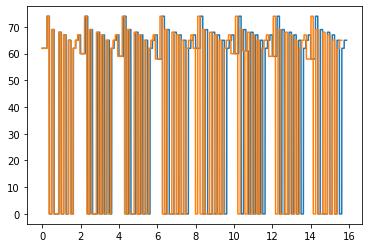

In [11]:
midi_data = pm.PrettyMIDI(path + midi_file)
v1 = Visualizer(midi_data)
midi_data = pm.PrettyMIDI(path_save + midi_file[:-4]+"_note_tuple.mid")
v2 = Visualizer(midi_data)



t1, p1, l1 = v1.get_f0_loudness_time()
t2, p2, l2 = v2.get_f0_loudness_time()

plt.plot(t1, p1, label = "original")
plt.plot(t2, p2, label = "reconstruct")
plt.show()

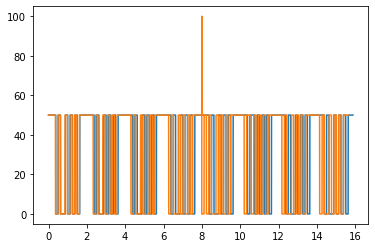

In [12]:
plt.plot(t1, l1, label = "original")
plt.plot(t2, l2, label = "reconstruct")
plt.show()

We observe slight time variations -> due to time quantification for note tuple.
It can be corrected by stretching time (considering quantification error is uniform).

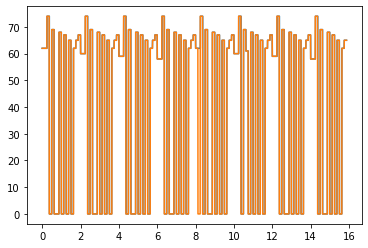

In [13]:
ratio = t1[-1]/t2[-1]
t_reconst_adapt = t2 *ratio 

plt.plot(t1, p1, label = "original")
plt.plot(t_reconst_adapt, p2, label = "reconstruct")
plt.show()

### F0 and Loudness vectors from Midi Like

In [14]:
midi_like_seq


SET_VELOCITY<50.0>
NOTE_ON<62>
TIME_SHIFT<125.0>
NOTE_OFF<62.0>
NOTE_ON<62>
TIME_SHIFT<125.0>
NOTE_OFF<62.0>
NOTE_ON<74>
TIME_SHIFT<125.0>
NOTE_OFF<74.0>
TIME_SHIFT<125.0>
NOTE_ON<69>
TIME_SHIFT<125.0>
NOTE_OFF<69.0>
TIME_SHIFT<250.0>
NOTE_ON<68>
TIME_SHIFT<125.0>
NOTE_OFF<68.0>
TIME_SHIFT<125.0>
NOTE_ON<67>
TIME_SHIFT<125.0>
NOTE_OFF<67.0>
TIME_SHIFT<125.0>
NOTE_ON<65>
TIME_SHIFT<125.0>
NOTE_OFF<65.0>
TIME_SHIFT<125.0>
NOTE_ON<62>
TIME_SHIFT<125.0>
NOTE_OFF<62.0>
NOTE_ON<65>
TIME_SHIFT<125.0>
NOTE_OFF<65.0>
NOTE_ON<67>
TIME_SHIFT<125.0>
NOTE_OFF<67.0>
NOTE_ON<60>
TIME_SHIFT<125.0>
NOTE_OFF<60.0>
NOTE_ON<60>
TIME_SHIFT<125.0>
NOTE_OFF<60.0>
NOTE_ON<74>
TIME_SHIFT<125.0>
NOTE_OFF<74.0>
TIME_SHIFT<125.0>
NOTE_ON<69>
TIME_SHIFT<125.0>
NOTE_OFF<69.0>
TIME_SHIFT<250.0>
NOTE_ON<68>
TIME_SHIFT<125.0>
NOTE_OFF<68.0>
TIME_SHIFT<125.0>
NOTE_ON<67>
TIME_SHIFT<125.0>
NOTE_OFF<67.0>
TIME_SHIFT<125.0>
NOTE_ON<65>
TIME_SHIFT<125.0>
NOTE_OFF<65.0>
TIME_SHIFT<125.0>
NOTE_ON<62>
TIME_SHIFT<125.0>
NOTE_O

In [15]:
frame_rate = 16000
pitch, loudness, t = midi_like_seq.get_f0_loudness_time(frame_rate, pitch_unit="HERTZ")

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


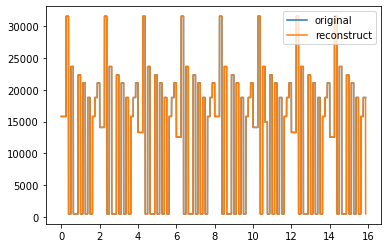

In [16]:
plt.plot(t1, convert_midi2hz(p1), label = "original")
plt.plot(t, pitch, label = "reconstruct")
plt.legend()
plt.show()

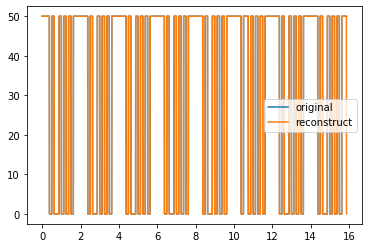

In [17]:
plt.plot(t1, l1, label = "original")
plt.plot(t,  loudness, label = "reconstruct")
plt.legend()
plt.show()

## Reconstruction between f0 loudness from midi and f0 loudness from midi-like file 

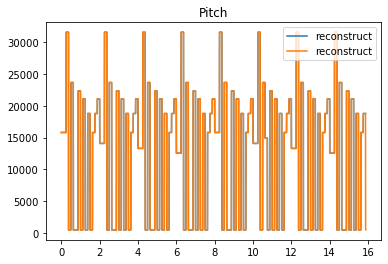

In [18]:
midi_data = pm.PrettyMIDI(path_save + midi_file[:-4]+"_midi_like.mid")
v2 = Visualizer(midi_data)
t2, p2, l2 = v2.get_f0_loudness_time()

plt.plot(t2, convert_midi2hz(p2), label = "reconstruct")
plt.plot(t, pitch, label = "reconstruct")
plt.legend()
plt.title("Pitch")
plt.show()

## Reconstruction between f0 loudness from midi and f0 loudness from note-tuple

In [19]:
note_tuple_seq

(0,0,62,50,0,12)
(0,12,62,50,0,12)
(0,12,74,50,0,12)
(0,25,69,50,0,12)
(0,37,68,50,0,12)
(0,25,67,50,0,12)
(0,25,65,50,0,12)
(0,25,62,50,0,12)
(0,12,65,50,0,12)
(0,12,67,50,0,12)
(0,12,60,50,0,12)
(0,12,60,50,0,12)
(0,12,74,50,0,12)
(0,25,69,50,0,12)
(0,37,68,50,0,12)
(0,25,67,50,0,12)
(0,25,65,50,0,12)
(0,25,62,50,0,12)
(0,12,65,50,0,12)
(0,12,67,50,0,12)
(0,12,59,50,0,12)
(0,12,59,50,0,12)
(0,12,74,50,0,12)
(0,25,69,50,0,12)
(0,37,68,50,0,12)
(0,25,67,50,0,12)
(0,25,65,50,0,12)
(0,25,62,50,0,12)
(0,12,65,50,0,12)
(0,12,67,50,0,12)
(0,12,58,50,0,12)
(0,12,58,50,0,12)
(0,12,74,50,0,12)
(0,25,69,50,0,12)
(0,37,68,50,0,12)
(0,25,67,50,0,12)
(0,25,65,50,0,12)
(0,25,62,50,0,12)
(0,12,65,50,0,12)
(0,12,67,50,0,12)
(0,12,62,50,0,12)
(0,12,62,50,0,12)
(0,12,74,50,0,12)
(0,25,69,50,0,12)
(0,37,68,50,0,12)
(0,25,67,50,0,12)
(0,25,65,50,0,12)
(0,25,62,50,0,12)
(0,12,65,50,0,12)
(0,12,67,50,0,12)
(0,12,60,50,0,12)
(0,12,60,50,0,12)
(0,12,74,50,0,12)
(0,25,69,50,0,12)
(0,12,61,50,0,12)
(0,25,68,50

15.62449550449551


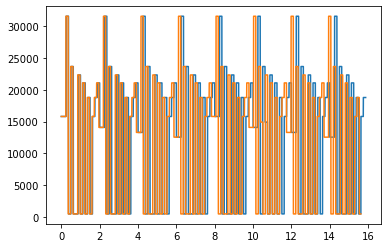

In [29]:
midi_data = pm.PrettyMIDI(path + midi_file)
v1 = Visualizer(midi_data)

t1, p1, l1 = v1.get_f0_loudness_time()
p2, l2, t2 = note_tuple_seq.get_f0_loudness_time(1600,"HERTZ")

plt.plot(t1, convert_midi2hz(p1), label = "original")
plt.plot(t2, p2, label = "reconstruct")
plt.show()

With quantification time correction : 

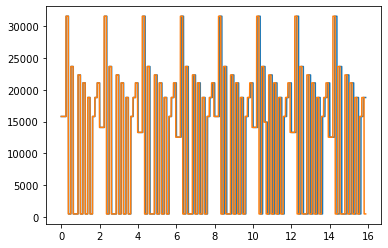

In [31]:
ratio = t1[-1]/t2[-1]
t_reconst_adapt = t2 *ratio 

plt.plot(t1, convert_midi2hz(p1), label = "original")
plt.plot(t_reconst_adapt, p2, label = "reconstruct")
plt.show()

## Import midi like and note-tuple files

In [32]:
mdlk = MidiLikeSeq()
mdlk.load("midi-like.txt")
mdlk

15.875


SET_VELOCITY<50.0>
NOTE_ON<62>
TIME_SHIFT<125.0>
NOTE_OFF<62.0>
NOTE_ON<62>
TIME_SHIFT<125.0>
NOTE_OFF<62.0>
NOTE_ON<74>
TIME_SHIFT<125.0>
NOTE_OFF<74.0>
TIME_SHIFT<125.0>
NOTE_ON<69>
TIME_SHIFT<125.0>
NOTE_OFF<69.0>
TIME_SHIFT<250.0>
NOTE_ON<68>
TIME_SHIFT<125.0>
NOTE_OFF<68.0>
TIME_SHIFT<125.0>
NOTE_ON<67>
TIME_SHIFT<125.0>
NOTE_OFF<67.0>
TIME_SHIFT<125.0>
NOTE_ON<65>
TIME_SHIFT<125.0>
NOTE_OFF<65.0>
TIME_SHIFT<125.0>
NOTE_ON<62>
TIME_SHIFT<125.0>
NOTE_OFF<62.0>
NOTE_ON<65>
TIME_SHIFT<125.0>
NOTE_OFF<65.0>
NOTE_ON<67>
TIME_SHIFT<125.0>
NOTE_OFF<67.0>
NOTE_ON<60>
TIME_SHIFT<125.0>
NOTE_OFF<60.0>
NOTE_ON<60>
TIME_SHIFT<125.0>
NOTE_OFF<60.0>
NOTE_ON<74>
TIME_SHIFT<125.0>
NOTE_OFF<74.0>
TIME_SHIFT<125.0>
NOTE_ON<69>
TIME_SHIFT<125.0>
NOTE_OFF<69.0>
TIME_SHIFT<250.0>
NOTE_ON<68>
TIME_SHIFT<125.0>
NOTE_OFF<68.0>
TIME_SHIFT<125.0>
NOTE_ON<67>
TIME_SHIFT<125.0>
NOTE_OFF<67.0>
TIME_SHIFT<125.0>
NOTE_ON<65>
TIME_SHIFT<125.0>
NOTE_OFF<65.0>
TIME_SHIFT<125.0>
NOTE_ON<62>
TIME_SHIFT<125.0>
NOTE_O

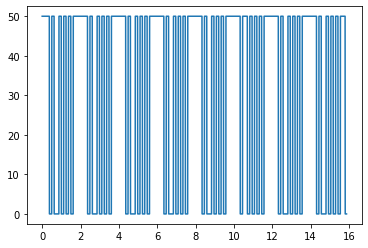

In [33]:
p, l, t = mdlk.get_f0_loudness_time(1600)

plt.plot(t, l, label = "reconstruct")
plt.show()

In [34]:
ntpl = NoteTupleSeq()
ntpl.load("note-tuples.txt")
ntpl

(0,0,62,50,0,12)
(0,12,62,50,0,12)
(0,12,74,50,0,12)
(0,25,69,50,0,12)
(0,37,68,50,0,12)
(0,25,67,50,0,12)
(0,25,65,50,0,12)
(0,25,62,50,0,12)
(0,12,65,50,0,12)
(0,12,67,50,0,12)
(0,12,60,50,0,12)
(0,12,60,50,0,12)
(0,12,74,50,0,12)
(0,25,69,50,0,12)
(0,37,68,50,0,12)
(0,25,67,50,0,12)
(0,25,65,50,0,12)
(0,25,62,50,0,12)
(0,12,65,50,0,12)
(0,12,67,50,0,12)
(0,12,59,50,0,12)
(0,12,59,50,0,12)
(0,12,74,50,0,12)
(0,25,69,50,0,12)
(0,37,68,50,0,12)
(0,25,67,50,0,12)
(0,25,65,50,0,12)
(0,25,62,50,0,12)
(0,12,65,50,0,12)
(0,12,67,50,0,12)
(0,12,58,50,0,12)
(0,12,58,50,0,12)
(0,12,74,50,0,12)
(0,25,69,50,0,12)
(0,37,68,50,0,12)
(0,25,67,50,0,12)
(0,25,65,50,0,12)
(0,25,62,50,0,12)
(0,12,65,50,0,12)
(0,12,67,50,0,12)
(0,12,62,50,0,12)
(0,12,62,50,0,12)
(0,12,74,50,0,12)
(0,25,69,50,0,12)
(0,37,68,50,0,12)
(0,25,67,50,0,12)
(0,25,65,50,0,12)
(0,25,62,50,0,12)
(0,12,65,50,0,12)
(0,12,67,50,0,12)
(0,12,60,50,0,12)
(0,12,60,50,0,12)
(0,12,74,50,0,12)
(0,25,69,50,0,12)
(0,12,61,50,0,12)
(0,25,68,50

15.62449550449551


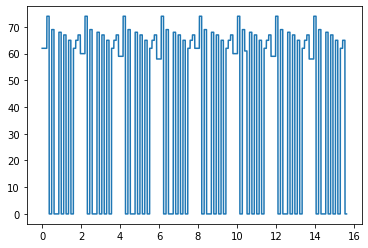

In [35]:
p, l, t = ntpl.get_f0_loudness_time(1600)
plt.plot(t, p, label = "reconstruct")
plt.show()